In [1]:
import experiment_framework as ef
from pyexpat import model
import networkx as nx
import matplotlib.pyplot as plt
import copy
import numpy as np
import pickle

In [2]:
G = nx.erdos_renyi_graph(2000, 0.005)
model = ef.run_influence_cascade(G, num_influencers=20, steps=3, selection_method='random')

In [3]:
model = ef.run_influence_cascade(G, num_influencers=50, steps=3, selection_method='random')

# Evaluate the influence and deinfluence
num_influenced = model.evaluate_influence()
num_deinfluenced = model.evaluate_deinfluence()
num_susceptible = model.evaluate_susceptible()

# Create a deep copy of the model
model_fixed_influencers = copy.deepcopy(model)

# Evaluate the influence and deinfluence
num_influenced = model_fixed_influencers.evaluate_influence()
num_deinfluenced = model_fixed_influencers.evaluate_deinfluence()
num_susceptible = model_fixed_influencers.evaluate_susceptible()

print(f"Number of influenced nodes: {num_influenced}")
print(f"Number of deinfluenced nodes: {num_deinfluenced}")
print(f"Number of susceptible nodes: {num_susceptible}")
print('influencer', model.selected_influencers)

Number of influenced nodes: 1870
Number of deinfluenced nodes: 0
Number of susceptible nodes: 130
influencer {0, 1667, 1411, 523, 1421, 276, 407, 409, 1820, 1053, 1438, 420, 1061, 1573, 423, 300, 1837, 686, 561, 1842, 50, 690, 700, 198, 583, 1996, 207, 80, 209, 594, 1619, 83, 982, 1884, 605, 1759, 97, 1509, 1386, 235, 1003, 1262, 494, 1776, 625, 1522, 1140, 1526, 765, 1918}


In [4]:
# Run simulation for different values of k
budget_list = list(range(1, 101))
deinfluencers_list = ef.select_deinfluencers_budget(budget_list, model_fixed_influencers,'budget_sqrt')
results = ef.average_results_simple(deinfluencers_list, model_fixed_influencers, num_runs=3, steps=3)

print(deinfluencers_list)

[(1, {'Random': set(), 'Degree': set()}), (2, {'Random': set(), 'Degree': set()}), (3, {'Random': set(), 'Degree': set()}), (4, {'Random': set(), 'Degree': set()}), (5, {'Random': {1149}, 'Degree': {930}}), (6, {'Random': {1360}, 'Degree': {930}}), (7, {'Random': {1266, 348}, 'Degree': {930}}), (8, {'Random': {1809, 388}, 'Degree': {930}}), (9, {'Random': {1033, 259}, 'Degree': {930}}), (10, {'Random': {728, 1457, 1983}, 'Degree': {930, 1933}}), (11, {'Random': {264, 737, 1630}, 'Degree': {930, 1933}}), (12, {'Random': {1306, 804, 446}, 'Degree': {930, 1933}}), (13, {'Random': {1048, 410, 1931}, 'Degree': {930, 1933}}), (14, {'Random': {164, 1767, 1262, 978, 311}, 'Degree': {930, 1933, 1454}}), (15, {'Random': {1436, 162, 68, 978}, 'Degree': {930, 1933, 1454}}), (16, {'Random': {608, 1382, 45, 1107, 1208}, 'Degree': {930, 1933, 1454}}), (17, {'Random': {1511, 1321, 1429, 182, 375}, 'Degree': {930, 1933, 1454}}), (18, {'Random': {997, 1611, 1293, 1745, 914, 986}, 'Degree': {930, 1933, 1

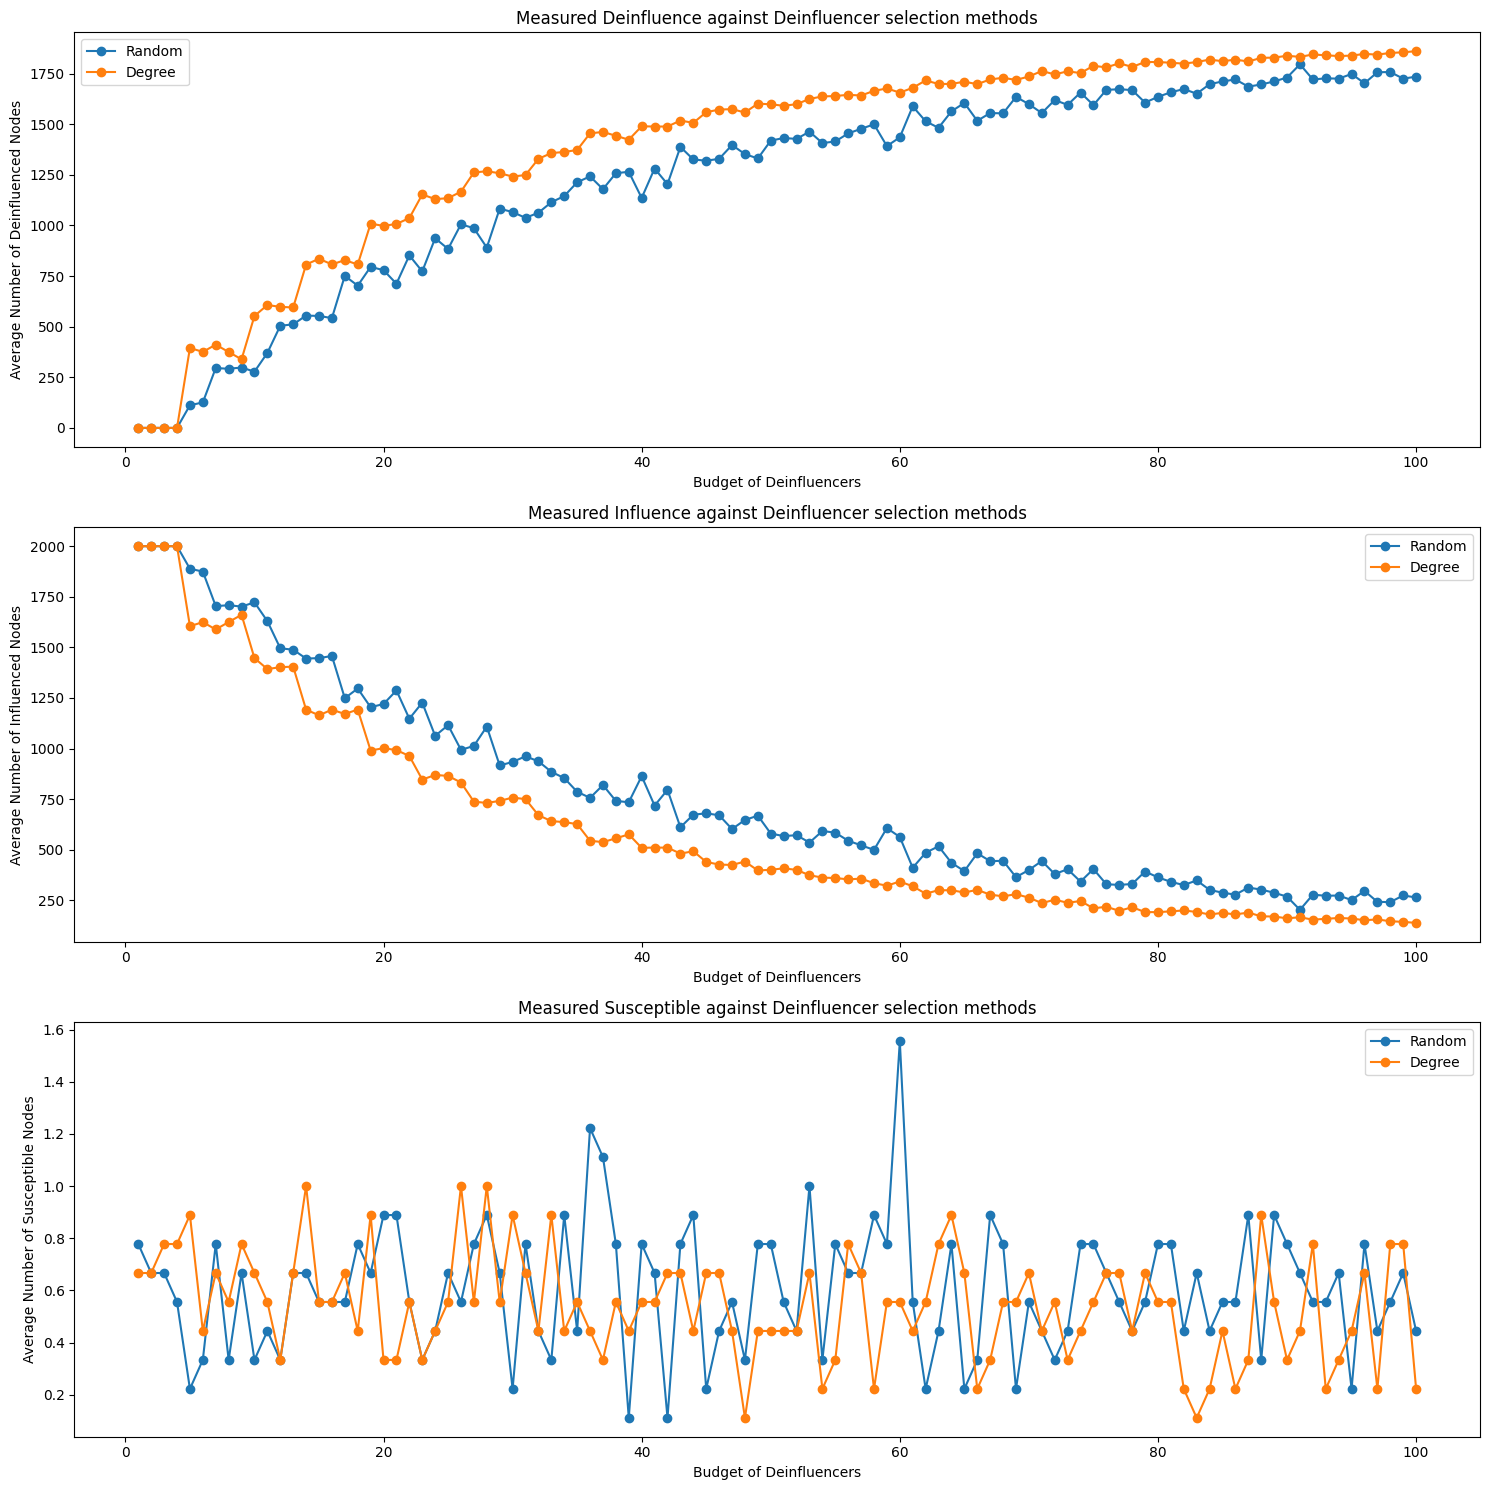

In [5]:

# Plotting results
fig, axs = plt.subplots(3, figsize=(15, 15))
axs[0].set_title('Measured Deinfluence against Deinfluencer selection methods')
axs[1].set_title('Measured Influence against Deinfluencer selection methods')
axs[2].set_title('Measured Susceptible against Deinfluencer selection methods')

# Create line plots
methods = results[next(iter(results))].keys()  # Get all methods from the first key
k_values = sorted(results.keys())  # Sort k values for plotting
total_nodes = len(G.nodes)

for method in methods:
    deinfluenced_nodes = [results[k][method][0] for k in k_values]
    influenced_nodes = [results[k][method][1] for k in k_values]
    susceptible_nodes = [total_nodes - (influenced + deinfluenced) for influenced, deinfluenced in zip(influenced_nodes, deinfluenced_nodes)]

    axs[0].plot(k_values, deinfluenced_nodes, label=method, marker="o")
    axs[1].plot(k_values, influenced_nodes, label=method, marker="o")
    axs[2].plot(k_values, susceptible_nodes, label=method, marker="o")

axs[0].legend()
axs[0].set_xlabel('Budget of Deinfluencers')
axs[0].set_ylabel('Average Number of Deinfluenced Nodes')

axs[1].legend()
axs[1].set_xlabel('Budget of Deinfluencers')
axs[1].set_ylabel('Average Number of Influenced Nodes')

axs[2].legend()
axs[2].set_xlabel('Budget of Deinfluencers')
axs[2].set_ylabel('Average Number of Susceptible Nodes')

plt.tight_layout()
plt.show()

In [6]:
# Run simulation for different values of k
budget_list = list(range(1, 101))
deinfluencers_list = ef.select_deinfluencers_budget(budget_list, model_fixed_influencers,'budget_linear')
results = ef.average_results_simple(deinfluencers_list, model_fixed_influencers, num_runs=3, steps=3)

print(deinfluencers_list)

[(1, {'Random': set(), 'Degree': set()}), (2, {'Random': set(), 'Degree': set()}), (3, {'Random': set(), 'Degree': set()}), (4, {'Random': set(), 'Degree': set()}), (5, {'Random': set(), 'Degree': set()}), (6, {'Random': set(), 'Degree': set()}), (7, {'Random': set(), 'Degree': set()}), (8, {'Random': set(), 'Degree': set()}), (9, {'Random': set(), 'Degree': set()}), (10, {'Random': set(), 'Degree': set()}), (11, {'Random': {70}, 'Degree': set()}), (12, {'Random': {1039}, 'Degree': set()}), (13, {'Random': {1234}, 'Degree': set()}), (14, {'Random': {1439}, 'Degree': set()}), (15, {'Random': {343}, 'Degree': set()}), (16, {'Random': {329}, 'Degree': set()}), (17, {'Random': {980}, 'Degree': set()}), (18, {'Random': {1358}, 'Degree': set()}), (19, {'Random': {1628, 1399}, 'Degree': set()}), (20, {'Random': {497, 33}, 'Degree': set()}), (21, {'Random': {63}, 'Degree': {930}}), (22, {'Random': {80, 1242}, 'Degree': {930}}), (23, {'Random': {1011, 758}, 'Degree': {930}}), (24, {'Random': {7

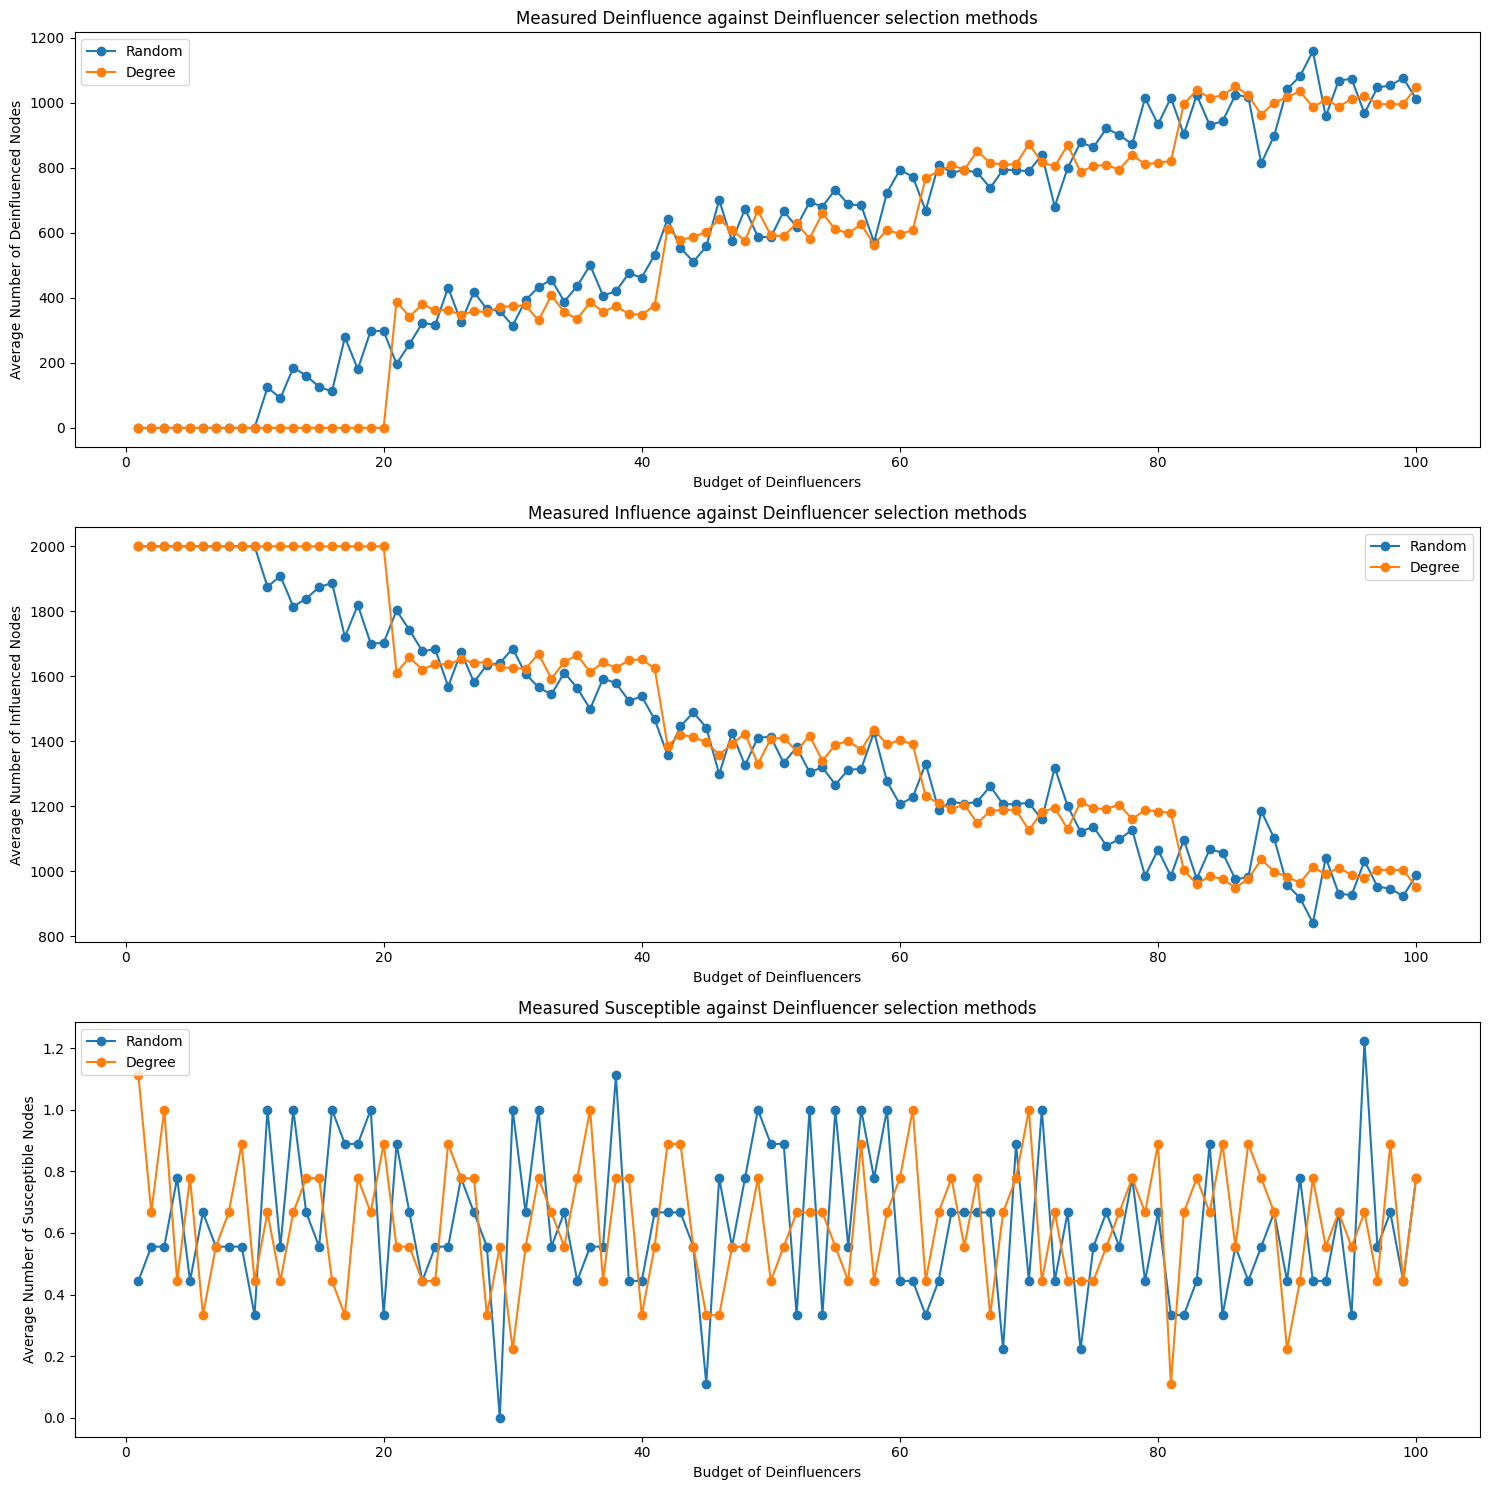

In [7]:

# Plotting results
fig, axs = plt.subplots(3, figsize=(15, 15))
axs[0].set_title('Measured Deinfluence against Deinfluencer selection methods')
axs[1].set_title('Measured Influence against Deinfluencer selection methods')
axs[2].set_title('Measured Susceptible against Deinfluencer selection methods')

# Create line plots
methods = results[next(iter(results))].keys()  # Get all methods from the first key
k_values = sorted(results.keys())  # Sort k values for plotting
total_nodes = len(G.nodes)

for method in methods:
    deinfluenced_nodes = [results[k][method][0] for k in k_values]
    influenced_nodes = [results[k][method][1] for k in k_values]
    susceptible_nodes = [total_nodes - (influenced + deinfluenced) for influenced, deinfluenced in zip(influenced_nodes, deinfluenced_nodes)]

    axs[0].plot(k_values, deinfluenced_nodes, label=method, marker="o")
    axs[1].plot(k_values, influenced_nodes, label=method, marker="o")
    axs[2].plot(k_values, susceptible_nodes, label=method, marker="o")

axs[0].legend()
axs[0].set_xlabel('Budget of Deinfluencers')
axs[0].set_ylabel('Average Number of Deinfluenced Nodes')

axs[1].legend()
axs[1].set_xlabel('Budget of Deinfluencers')
axs[1].set_ylabel('Average Number of Influenced Nodes')

axs[2].legend()
axs[2].set_xlabel('Budget of Deinfluencers')
axs[2].set_ylabel('Average Number of Susceptible Nodes')

plt.tight_layout()
plt.show()